In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import preprocessing, svm, metrics, ensemble, tree
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score


In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [6]:
#Drop unwanted variables

In [7]:
df2 = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 'X', 'Y', 
                         'STATUS', 'ADDRTYPE', 'INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC',
                         'INCDATE','INCDTTM','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','PEDROWNOTGRNT', 'SDOTCOLNUM',
                         'ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])


In [8]:
#Change to categorical

In [9]:
df2["ROADCOND"] = df2["ROADCOND"].astype('category')
df2["WEATHER"] = df2["WEATHER"].astype('category')
df2["LIGHTCOND"] = df2["LIGHTCOND"].astype('category')

df2["ROADCOND_CATG"] = df2["ROADCOND"].cat.codes
df2["WEATHER_CATG"] = df2["WEATHER"].cat.codes
df2["LIGHTCOND_CATG"] = df2["LIGHTCOND"].cat.codes

df2.dtypes

SEVERITYCODE         int64
WEATHER           category
ROADCOND          category
LIGHTCOND         category
ROADCOND_CATG         int8
WEATHER_CATG          int8
LIGHTCOND_CATG        int8
dtype: object

In [10]:
df2.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
0,2,Overcast,Wet,Daylight,8,4,5
1,1,Raining,Wet,Dark - Street Lights On,8,6,2
2,1,Overcast,Dry,Daylight,0,4,5
3,1,Clear,Dry,Daylight,0,1,5
4,2,Raining,Wet,Daylight,8,6,5


In [11]:
df2["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [12]:
df2["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [13]:
df2["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [14]:
df2["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [15]:
from sklearn.utils import resample

In [16]:
df2_class1 = df2[df2.SEVERITYCODE==1]
df2_class2 = df2[df2.SEVERITYCODE==2]

df2_class1_resampled = resample(df2_class1, replace=False,
                               n_samples=58188,
                               random_state=123)

df2_bal = pd.concat([df2_class1_resampled,df2_class2])
df2_bal.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [17]:
len(df2_bal)

116376

In [18]:
df2_bal.head(10)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
25055,1,Raining,Wet,Dark - Street Lights On,8,6,2
65280,1,Clear,Dry,Daylight,0,1,5
86292,1,Unknown,Unknown,Unknown,7,10,8
155111,1,Clear,Dry,Daylight,0,1,5
64598,1,Clear,Dry,Daylight,0,1,5
119954,1,Clear,Dry,Daylight,0,1,5
64063,1,Clear,Dry,Daylight,0,1,5
105379,1,Clear,Dry,Daylight,0,1,5
181211,1,NaN,NaN,NaN,-1,-1,-1
187708,1,Clear,Dry,Daylight,0,1,5


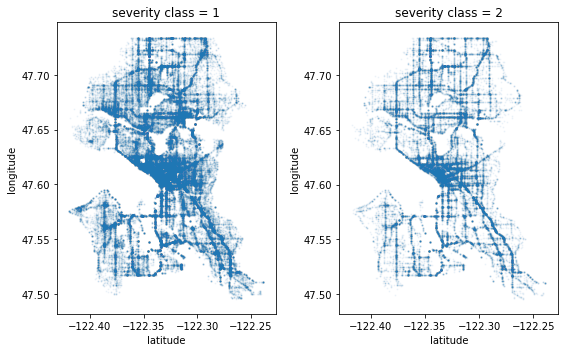

In [19]:
fig, axs = plt.subplots(1,2,figsize=(8,5))
for(ax, (code,d)) in zip(axs, df.groupby('SEVERITYCODE')):
    ax.scatter(d.X, d.Y, s=1, alpha=0.05)
    ax.set(xlabel='latitude', ylabel='longitude', title='severity class = {}'.format(code))
    
plt.tight_layout()

,Severity Counts,Severity Percentage
Property Damage Only Collision,136485,70.109877
Injury Collision,58188,29.890123


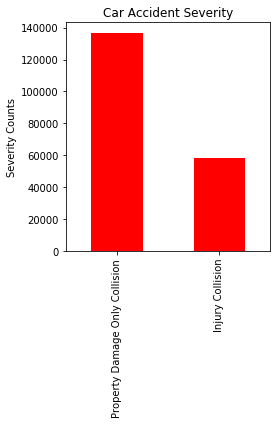

In [20]:
df[['SEVERITYCODE', 'SEVERITYDESC']].drop_duplicates().sort_values('SEVERITYCODE')
tot_coll = df['SEVERITYDESC'].value_counts().sum()

df_count_coll = df['SEVERITYDESC'].value_counts().to_frame("Severity Counts")
df_percentage_coll = (df['SEVERITYDESC'].value_counts()/tot_coll*100).to_frame("Severity Percentage")
fig,ax = plt.subplots(figsize=(4,6))

ax = df['SEVERITYDESC'].value_counts().plot.bar(color='r');
ax.set(ylabel='Severity Counts', title='Car Accident Severity')
plt.tight_layout()

df_count_coll.join(df_percentage_coll)

,Collision Counts,Percentage of collissions
Parked Car,47987,25.287060
Angles,34674,18.271688
Rear Ended,34090,17.963946
Other,23703,12.490449
Sideswipe,18609,9.806133
Left Turn,13703,7.220884
Pedestrian,6608,3.482128
Cycles,5415,2.853469
Right Turn,2956,1.557683
Head On,2024,1.066560


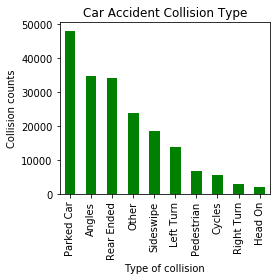

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
df['COLLISIONTYPE'].value_counts().plot.bar(ax=ax, color='g')
ax.set(ylabel='Collision counts', xlabel='Type of collision', title='Car Accident Collision Type')
plt.tight_layout()

df_colltyp_counts = df['COLLISIONTYPE'].value_counts().to_frame("Collision Counts")
df_colltyp_perc = (pd.value_counts(df['COLLISIONTYPE'])/pd.value_counts(df['COLLISIONTYPE']).sum()*100).to_frame("Percentage of collissions")
df_colltyp_counts.join(df_colltyp_perc)

,Junction Accident Counts,Junction Accident Percentage
Mid-Block (not related to intersection),89800,47.678716
At Intersection (intersection related),62810,33.348554
Mid-Block (but intersection related),22790,12.100200
Driveway Junction,10671,5.665697
At Intersection (but not related to intersection),2098,1.113919
Ramp Junction,166,0.088137
Unknown,9,0.004778


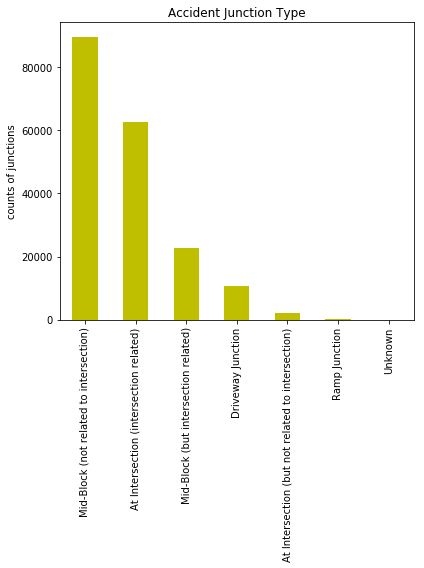

In [22]:
fig, ax = plt.subplots(figsize=(6,8))
df['JUNCTIONTYPE'].value_counts().plot.bar(ax=ax, color='y')
ax.set(ylabel='counts of junctions', title='Accident Junction Type')
plt.tight_layout()

df_jtype_counts = df['JUNCTIONTYPE'].value_counts().to_frame("Junction Accident Counts")
df_jtype_perc = (pd.value_counts(df['JUNCTIONTYPE'])/pd.value_counts(df['JUNCTIONTYPE']).sum()*100).to_frame("Junction Accident Percentage")
df_jtype_counts.join(df_jtype_perc)

,Road Condition Counts,Road Condition Percentage
Dry,124510,65.648710
Wet,47474,25.030976
Unknown,15078,7.949974
Ice,1209,0.637453
Snow/Slush,1004,0.529366
Other,132,0.069598
Standing Water,115,0.060635
Sand/Mud/Dirt,75,0.039544
Oil,64,0.033744


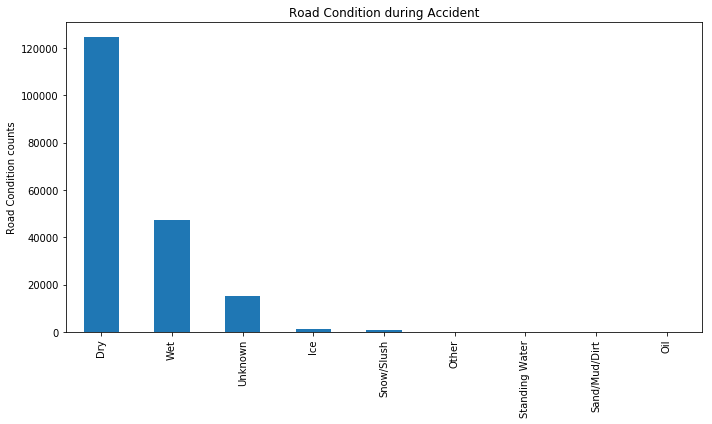

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

ax = df['ROADCOND'].value_counts().plot.bar();
ax.set(ylabel='Road Condition counts', title='Road Condition during Accident')
plt.tight_layout()

df_roadcondtn_counts = df['ROADCOND'].value_counts().to_frame("Road Condition Counts")
df_roadcondtn_perc = (pd.value_counts(df['ROADCOND'])/pd.value_counts(df['ROADCOND']).sum()*100).to_frame("Road Condition Percentage")
df_roadcondtn_counts.join(df_roadcondtn_perc)

In [24]:
X = np.asarray(df2_bal[['ROADCOND_CATG', 'WEATHER_CATG','LIGHTCOND_CATG']])
X[0:5]

array([[ 8,  6,  2],
       [ 0,  1,  5],
       [ 7, 10,  8],
       [ 0,  1,  5],
       [ 0,  1,  5]], dtype=int8)

In [25]:
len(X)

116376

In [26]:
Y = np.asarray(df2_bal['SEVERITYCODE'])
Y[0:5]

array([1, 1, 1, 1, 1])

In [27]:
len(Y)

116376

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.52797946,  1.15236718, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [ 1.25312582,  2.61416492,  2.07606076],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835]])

In [29]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.3, random_state=42)


In [30]:
X_train

array([[ 1.52797946,  0.42146831, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835],
       ...,
       [ 1.52797946,  1.15236718, -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [-0.67084969, -0.67488   ,  0.42978835]])

In [31]:
Y_train

array([2, 1, 1, ..., 2, 1, 1])

In [32]:
X_test

array([[-0.94570333, -1.40577887, -2.86275649],
       [ 1.52797946,  1.15236718, -0.11896913],
       [-0.67084969, -0.67488   ,  0.42978835],
       ...,
       [-0.67084969, -0.67488   , -1.21648407],
       [-0.67084969, -0.67488   ,  0.42978835],
       [ 1.25312582,  2.61416492,  0.42978835]])

In [33]:
Y_test

array([1, 1, 2, ..., 1, 1, 1])

In [34]:
train_test_split(Y, shuffle=False)

[array([1, 1, 1, ..., 2, 2, 2]), array([2, 2, 2, ..., 2, 2, 2])]

In [35]:
print ('Training set:', X_train.shape,  Y_train.shape)
print ('Testing set:', X_test.shape,  Y_test.shape)

Training set: (81463, 3) (81463,)
Testing set: (34913, 3) (34913,)


In [36]:
#K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
k = 25

In [38]:
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNNyhat = neigh.predict(X_test)
KNNyhat[0:5]

array([1, 1, 1, 1, 1])

In [39]:
#Decision Tree

In [40]:
colDataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
colDataTree
colDataTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
DTyhat = colDataTree.predict(X_test)
print (DTyhat [0:5])
print (Y_test [0:5])

[1 2 2 2 2]
[1 1 2 1 1]


In [42]:
#Logistic Regression

In [43]:
lr = LogisticRegression(C=0.03, solver='liblinear').fit(X_train,Y_train)
lr

LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
LRyhat = lr.predict(X_test)
LRyhat

LRyhat_prob = lr.predict_proba(X_test)
LRyhat_prob

array([[0.40364293, 0.59635707],
       [0.53529771, 0.46470229],
       [0.46743605, 0.53256395],
       ...,
       [0.46293233, 0.53706767],
       [0.46743605, 0.53256395],
       [0.67878612, 0.32121388]])

In [45]:
lr.intercept_

array([0.00624186])

In [46]:
lr.coef_

array([[ 0.18605376, -0.37597609, -0.01099622]])

In [47]:
df3 = df2
df3.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
0,2,Overcast,Wet,Daylight,8,4,5
1,1,Raining,Wet,Dark - Street Lights On,8,6,2
2,1,Overcast,Dry,Daylight,0,4,5
3,1,Clear,Dry,Daylight,0,1,5
4,2,Raining,Wet,Daylight,8,6,5


In [48]:
df4 = df2.drop(columns = ['SEVERITYCODE'])
df4.head()

,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
0,Overcast,Wet,Daylight,8,4,5
1,Raining,Wet,Dark - Street Lights On,8,6,2
2,Overcast,Dry,Daylight,0,4,5
3,Clear,Dry,Daylight,0,1,5
4,Raining,Wet,Daylight,8,6,5


In [49]:
unscaled_inputs = df4
unscaled_inputs.head()

,WEATHER,ROADCOND,LIGHTCOND,ROADCOND_CATG,WEATHER_CATG,LIGHTCOND_CATG
0,Overcast,Wet,Daylight,8,4,5
1,Raining,Wet,Dark - Street Lights On,8,6,2
2,Overcast,Dry,Daylight,0,4,5
3,Clear,Dry,Daylight,0,1,5
4,Raining,Wet,Daylight,8,6,5


In [50]:
#Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,Y_train)

RFY_pred=clf.predict(X_test)



acc=accuracy_score(Y_test, RFY_pred)




print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.561.


In [53]:
#Support Vector Machines

In [54]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [55]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.3, random_state=42)


In [56]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train) 
Yhat = clf.predict(X_test)
print('jaccard score is = ', jaccard_similarity_score(Y_test, Yhat))
print('f1 score is ', f1_score(Y_test, Yhat, average='weighted'))

jaccard score is =  0.5251339042763441
f1 score is  0.4912157579163964


In [57]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 
RBYhat = clf.predict(X_test)
print('jaccard score is = ', jaccard_similarity_score(Y_test, RBYhat))
print('f1 score is ', f1_score(Y_test, RBYhat, average='weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard score is =  0.5623979606450319
f1 score is  0.5376891372131893


In [58]:
RBYhat

array([1, 2, 2, ..., 1, 2, 1])

In [59]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train) 
Yhat = clf.predict(X_test)
print('jaccard score is = ', jaccard_similarity_score(Y_test, Yhat))
print('f1 score is ', f1_score(Y_test, Yhat, average='weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard score is =  0.5475037951479391
f1 score is  0.45669138502855283


In [60]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, Y_train) 
Yhat = clf.predict(X_test)
print('jaccard score is = ', jaccard_similarity_score(Y_test, Yhat))
print('f1 score is ', f1_score(Y_test, Yhat, average='weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard score is =  0.5359608168876923
f1 score is  0.529532205898484


In [61]:
#Use RBF

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 
RBYhat = clf.predict(X_test)
RBYhat

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 2, 2, ..., 1, 2, 1])

In [62]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [63]:
models = dict([ ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 3)),
               ('Linear Regression', LogisticRegression(C=0.03, solver='liblinear')), 
               ('Decision Tree', DecisionTreeClassifier(criterion="entropy", max_depth = 7)),
               ('Support Vector Machines', svm.SVC(kernel='rbf', probability=True)), ('Random Forest Classification', ensemble.RandomForestClassifier(n_estimators=100, max_depth=10))
              ])

In [64]:
for name, model in models.items():
    print('Current model = {}'.format(name))
    model.fit(X_train, Y_train)

Current model = K-Nearest Neighbors
Current model = Linear Regression
Current model = Decision Tree
Current model = Support Vector Machines


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Current model = Random Forest Classification


In [65]:
Yhat_dict = dict()
Yproba_dict = dict()
for name, model in models.items():
    Yhat = model.predict(X_test)
    Yhat_dict[name] = Yhat
    Yproba_dict[name] = model.predict_proba(X_test)[:,1]
    print('Classification of different models {}'.format(name))
    print(model)
    print(classification_report(Y_test, Yhat))
    print()
    print()
    print()

Classification of different models K-Nearest Neighbors
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           1       0.63      0.26      0.37     17619
           2       0.53      0.84      0.65     17294

   micro avg       0.55      0.55      0.55     34913
   macro avg       0.58      0.55      0.51     34913
weighted avg       0.58      0.55      0.51     34913




Classification of different models Linear Regression
LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           1       0.54      0.35      0.43     17619
           2    

In [66]:
#KNN Evaluation

In [67]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, KNNyhat)

0.5237017729785467

In [68]:
# F1-Score
f1_score(Y_test, KNNyhat, average='macro')

0.5196155093297656

In [69]:
#Decision Tree Evaluation

In [70]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, DTyhat)

0.5626843869045914

In [71]:
# F1-Score
f1_score(Y_test, DTyhat, average='macro')

0.5385207275454998

In [72]:
#Logistic Regression Evaluation

In [73]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, LRyhat)

0.523501274596855

In [74]:
# F1-Score
f1_score(Y_test, LRyhat, average='macro')

0.5098573271706865

In [75]:
# logloss
yhat_prob = lr.predict_proba(X_test)
log_loss(Y_test, yhat_prob)

0.6855290309651024

In [76]:
#SVM Evaluation

In [77]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, RBYhat)

0.5623979606450319

In [78]:
# F1-Score
f1_score(Y_test, RBYhat, average='macro')

0.5386632235323728

In [79]:
#Random Forest Classifier 

In [80]:
#Jaccard Similarity Score

In [81]:
jaccard_similarity_score(Y_test, RFY_pred)

0.5610231145991464

In [82]:
# F1-Score
f1_score(Y_test, RFY_pred, average='macro')

0.5329956691944944